In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [16]:
def kmeans(df, k=2, threshold=0.001, max_epochs=400):
    
    centroids = {}
    
    for i in range(k):
        centroids[i] = df[i]
    
    #fit part
    for i in range(max_epochs):
        classifications = {}
        for i in range(k):
            classifications[i] = []
        for columns in df:
            distances = [np.linalg.norm(columns-centroids[i]) for i in centroids]
            classification = distances.index(min(distances))
            classifications[classification].append(columns)
        prev = dict(centroids)
        for clas in classifications:
            centroids[clas] = np.average(classifications[clas], axis=0)
        
        opt = 1
        for i in centroids:
            origin = prev[i]
            curr = centroids[i]
            if np.sum((curr-origin)/origin*100.0) > threshold:
                opt = 0
        if opt:
            break
    
    #predict part
    preds = []
    for row in df:
        preds.append(np.argmin([np.linalg.norm(row-centroids[i]) for i in centroids]))
    return preds
        


In [2]:
df = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

In [17]:
kmeans(df)

[0, 0, 1, 1, 0, 1]

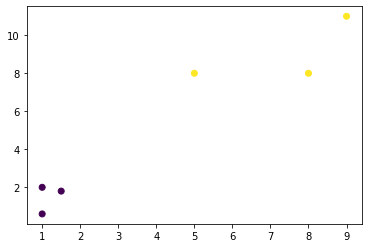

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df[:,0], df[:,1], c=kmeans(df))